<a href="https://colab.research.google.com/github/H-jung/LPOINT_Contest/blob/main/%EB%A1%AF%EB%8D%B0%EB%A9%A4%EB%B2%84%EC%8A%A4_RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 롯데멤버스 빅데이터경진대회
- 팀장 : 임현정
- 팀원 : 하혜영, 김윤지

## 사용 라이브러리

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rc('font',family = 'Malgun Gothic')
matplotlib.rc('axes',unicode_minus = False)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 고객 데모 정보
data1 = pd.read_csv("/content/drive/MyDrive/백업파일/공모전/LPOINT_BIG_COMP/LPOINT_BIG_COMP_01_DEMO.csv")
data1.columns = ['고객번호','성별','연령대','거주지']

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/백업파일/공모전/LPOINT_BIG_COMP/total.csv',parse_dates = ['구매일자'])

In [ ]:
r = df.groupby('고객번호')[['구매일자']].max()
f = df.groupby('고객번호')[['영수증번호']].nunique()
m = df.groupby('고객번호')[['구매금액']].sum()

In [ ]:
rfm = r.merge(f,on='고객번호').merge(m,on='고객번호')
rfm.구매일자 = (pd.to_datetime('2021-12-31') - rfm.구매일자).dt.days

In [ ]:
rfm.columns = ['R','F','M']
rfm

,R,F,M
고객번호,,,
M000034966,8,13,658020.0
M000059535,303,1,46000.0
M000136117,1,85,27611030.0
M000201112,33,5,53120.0
M000225114,0,88,2253900.0
...,...,...,...
M999708287,120,2,60000.0
M999770689,0,137,1422890.0
M999849895,30,35,1118792.0


In [ ]:
print(rfm.F.quantile(0.0))
print(rfm.F.quantile(0.4))
print(rfm.F.quantile(0.65))
print(rfm.F.quantile(0.85))
print(rfm.F.quantile(0.95))
print(rfm.F.quantile(1))

1.0
23.0
52.0
99.0
166.0
3032.0


In [ ]:
print(rfm.M.quantile(0.0))
print(rfm.M.quantile(0.4))
print(rfm.M.quantile(0.65))
print(rfm.M.quantile(0.85))
print(rfm.M.quantile(0.95))
print(rfm.M.quantile(1))

10.0
850675.0
2191290.0
5146837.5
12258280.5
409821075.0


In [ ]:
def RScore(x):
    if x >= 180:
        return 1
    elif x >= 90:
        return 2
    elif x >= 30:
        return 3
    elif x >= 10:
        return 4
    elif x >= 0:
        return 5

def FScore(x):
    if x >= 166:
        return 5
    elif x >= 99:
        return 4
    elif x >= 52:
        return 3
    elif x >= 23:
        return 2
    elif x >= 1:
        return 1

def MScore(x):
    if x >= 12258280:
        return 5
    elif x >= 5146837:
        return 4
    elif x >= 2191290:
        return 3
    elif x >= 850675:
        return 2
    elif x >= 10:
        return 1

def RFMScore(x):
    if x >= 4:
        return '플레티넘'
    elif x >= 3:
        return '골드'
    elif x >= 2:
        return '실버'
    elif x >= 1:
        return '일반'

In [ ]:
rfm['Rscore'] = rfm.R.apply(RScore)
rfm['Fscore'] = rfm.F.apply(FScore)
rfm['Mscore'] = rfm.M.apply(MScore)
rfm['RFM_Score'] = rfm.Rscore*0.2 + rfm.Fscore*0.4 + rfm.Mscore*0.4
rfm['고객등급'] = rfm.RFM_Score.apply(RFMScore)

In [ ]:
rfm

,R,F,M,Rscore,Fscore,Mscore,RFM_Score,고객등급
고객번호,,,,,,,,
M000034966,8,13,658020.0,5,1,1,1.8,일반
M000059535,303,1,46000.0,1,1,1,1.0,일반
M000136117,1,85,27611030.0,5,3,5,4.2,플레티넘
M000201112,33,5,53120.0,3,1,1,1.4,일반
M000225114,0,88,2253900.0,5,3,3,3.4,골드
...,...,...,...,...,...,...,...,...
M999708287,120,2,60000.0,2,1,1,1.2,일반
M999770689,0,137,1422890.0,5,4,2,3.4,골드
M999849895,30,35,1118792.0,3,2,2,2.2,실버


In [ ]:
len(rfm[(rfm.RFM_Score>=1) & (rfm.RFM_Score<2)])

10655

In [ ]:
rfm.고객등급.value_counts()

일반      10655
실버       8230
골드       7775
플레티넘     3096
Name: 고객등급, dtype: int64

In [ ]:
rfm.고객등급.value_counts(normalize=True)

일반      0.358079
실버      0.276583
골드      0.261292
플레티넘    0.104046
Name: 고객등급, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1167b340d0>]],
      dtype=object)

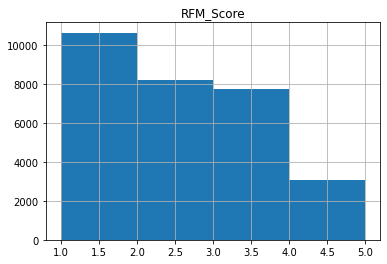

In [ ]:
rfm[['RFM_Score']].hist(bins=[1,2,3,4,5])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1167ab8bd0>]],
      dtype=object)

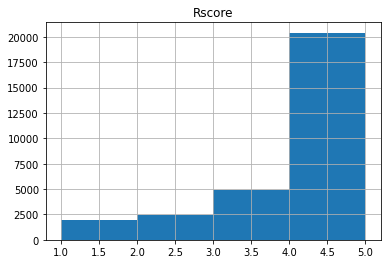

In [ ]:
rfm[['Rscore']].hist(bins=[1,2,3,4,5])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1167953890>]],
      dtype=object)

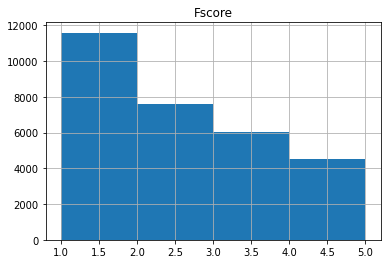

In [ ]:
rfm[['Fscore']].hist(bins=[1,2,3,4,5])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1167b25e90>]],
      dtype=object)

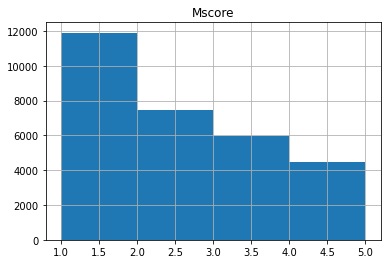

In [ ]:
rfm[['Mscore']].hist(bins=[1,2,3,4,5])

### DataSet 만들기

In [ ]:
data1

,고객번호,성별,연령대,거주지
0,M000034966,여성,40대,Z07
1,M000059535,여성,30대,Z12
2,M000136117,여성,30대,Z11
3,M000201112,여성,50대,Z17
4,M000225114,여성,40대,Z17
...,...,...,...,...
29908,M999708287,여성,40대,Z10
29909,M999770689,여성,30대,Z16
29910,M999849895,여성,20대,Z04
29911,M999926092,남성,30대,Z08


In [ ]:
rfm

,R,F,M,Rscore,Fscore,Mscore,RFM_Score,고객등급
고객번호,,,,,,,,
M000034966,8,13,658020.0,5,1,1,1.8,일반
M000059535,303,1,46000.0,1,1,1,1.0,일반
M000136117,1,85,27611030.0,5,3,5,4.2,플레티넘
M000201112,33,5,53120.0,3,1,1,1.4,일반
M000225114,0,88,2253900.0,5,3,3,3.4,골드
...,...,...,...,...,...,...,...,...
M999708287,120,2,60000.0,2,1,1,1.2,일반
M999770689,0,137,1422890.0,5,4,2,3.4,골드
M999849895,30,35,1118792.0,3,2,2,2.2,실버


In [ ]:
# df : (4630047,9)

final_data = df.merge(data1).merge(rfm.고객등급.reset_index())

In [ ]:
final_data

,고객번호,영수증번호,채널,제휴사,점포코드,구매일자,구매시간,구매금액,제휴사구분,성별,연령대,거주지,고객등급
0,M430112881,A01000001113,오프라인,A01,A010039,2021-01-01,10,15000.0,유통사,여성,50대,Z17,골드
1,M430112881,A01000003148,오프라인,A01,A010039,2021-01-01,10,19000.0,유통사,여성,50대,Z17,골드
2,M430112881,A01000003148,오프라인,A01,A010039,2021-01-01,10,19000.0,유통사,여성,50대,Z17,골드
3,M430112881,A01000004946,오프라인,A01,A010039,2021-01-01,10,19000.0,유통사,여성,50대,Z17,골드
4,M430112881,A01000005297,오프라인,A01,A010039,2021-01-01,10,9900.0,유통사,여성,50대,Z17,골드
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4630042,M461320805,21081215C012742314,온라인,C01,C010120,2021-08-12,15,42000.0,제휴사,남성,20대,Z13,일반
4630043,M094511286,21112413D014417246,오프라인,D01,D010528,2021-11-24,13,14120.0,제휴사,여성,20대,Z10,일반
4630044,M736929241,21091422C014625802,온라인,C01,C010011,2021-09-14,22,26000.0,제휴사,남성,20대,Z17,일반
4630045,M040608978,21102916C024520111,오프라인,C02,C020002,2021-10-29,16,27500.0,제휴사,남성,20대,Z04,일반


In [ ]:
final_data.to_csv('/content/drive/MyDrive/LPOINT/LPOINT_BIG_COMP/final_data.csv',index=False)